# Load Image set

In [272]:
import os
import cv2
import numpy as np
import math
from google.colab import drive
import matplotlib.pyplot as plt

In [273]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [274]:
# Check the directory structure to ensure the correct path
segmented_base_dir = "/content/drive/MyDrive/FYP/Lung/Segmented Images"

# Path to the directory containing segmented images
segmented_images_dir = os.path.join(segmented_base_dir, "Pneumothorax")
print(f"Using images directory: {segmented_images_dir}")

Using images directory: /content/drive/MyDrive/FYP/Lung/Segmented Images/Pneumothorax


In [275]:
# Check the directory structure to ensure the correct path
bone_suppressed_base_dir = "/content/drive/MyDrive/FYP/Lung/Bone Suppressed"

# Path to the directory containing segmented images
bone_suppressed_images_dir = os.path.join(bone_suppressed_base_dir, "Pneumothorax")
print(f"Using images directory: {bone_suppressed_images_dir}")

Using images directory: /content/drive/MyDrive/FYP/Lung/Bone Suppressed/Pneumothorax


# Pre-Process

In [276]:
def convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

In [277]:
def apply_adaptive_threshold(grayscale_image): #to increase the whiteness
    thresholded_image = cv2.adaptiveThreshold(grayscale_image, 255,
                                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)
    return thresholded_image


In [278]:
def preprocess_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Unable to load image.")
        return None

    # Step 1: Preprocess the image using GaussianBlur
    # Applying Gaussian blur to the image
    # Parameters:
    # (5, 5): Kernel size. It should be positive and odd.
    # 0: Standard deviation in the X direction (if zero, it is calculated from the kernel size)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Display the original image
    # plt.figure(figsize=(10, 10))

    # plt.subplot(1, 3, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title("Original Image")
    # plt.axis('off')

    # # Display the blurred image
    # plt.subplot(1, 3, 2)
    # plt.imshow(blurred, cmap='gray')
    # plt.title("Blurred Image")
    # plt.axis('off')

    # plt.show()

    return blurred

# Path to your image
image_path = "/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_0.png"
blurred_image = preprocess_image(image_path)

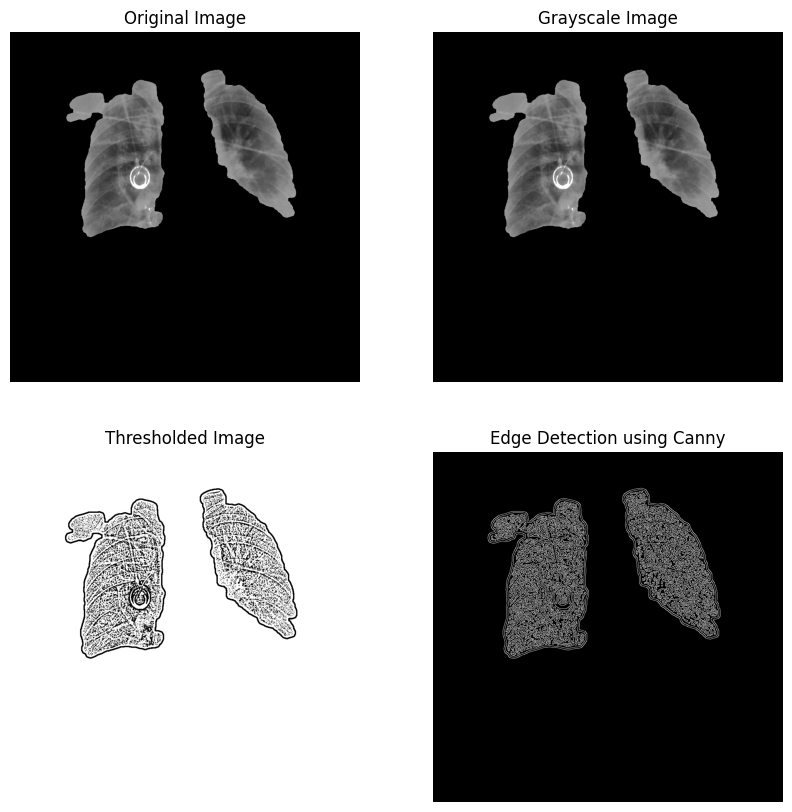

In [279]:
import cv2
import matplotlib.pyplot as plt

def detect_edges(image_path):
    # Read and display the original image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    thresholded_image = cv2.adaptiveThreshold(grayscale_image, 255,
                                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(thresholded_image, (5, 5), 0)

    # Detect edges using Canny
    edges = cv2.Canny(blurred, 100, 200)

    # Display images
    plt.figure(figsize=(10, 10))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Grayscale Image
    plt.subplot(2, 2, 2)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    # Thresholded Image
    plt.subplot(2, 2, 3)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title("Thresholded Image")
    plt.axis('off')

    # Edges Detected
    plt.subplot(2, 2, 4)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection using Canny")
    plt.axis('off')

    plt.show()

    return edges

# Example usage
#edges = detect_edges("/content/drive/MyDrive/FYP/Lung/Segmented Images/effusion1.png")
edges = detect_edges("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_0.png")


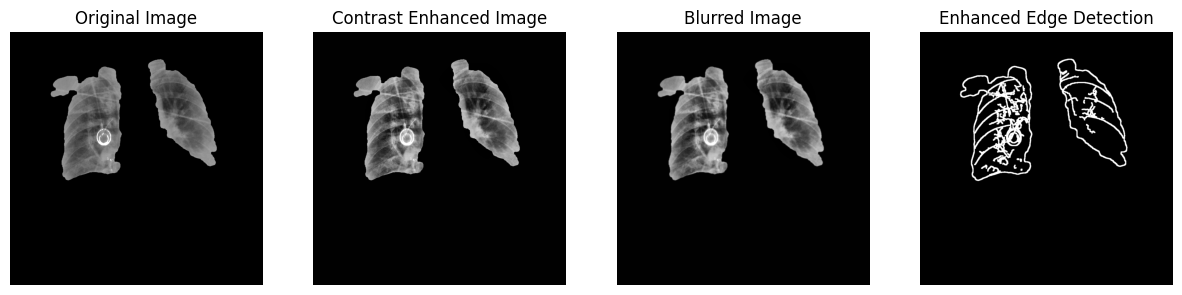

In [280]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    # Increase contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_image = clahe.apply(image)
    return contrast_image

def preprocess_and_detect_edges(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Unable to load image.")
        return None

    # Step 1: Preprocess the image by increasing contrast
    contrast_image = preprocess_image(image)

    # Step 2: Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(contrast_image, (5, 5), 0)

    # Step 3: Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Step 4: Increase contrast of edge lines
    # Apply morphological operations to enhance edges
    kernel = np.ones((5, 5), np.uint8)  # Larger kernel for more enhancement
    edges_dilated = cv2.dilate(edges, kernel, iterations=1)

    # Normalize the edge image to enhance contrast
    edges_normalized = cv2.normalize(edges_dilated, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Apply histogram equalization to further enhance contrast
    edges_contrast = cv2.equalizeHist(edges_normalized)

    # Display the results
    plt.figure(figsize=(15, 15))

    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(contrast_image, cmap='gray')
    plt.title("Contrast Enhanced Image")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(blurred, cmap='gray')
    plt.title("Blurred Image")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(edges_contrast, cmap='gray')
    plt.title("Enhanced Edge Detection")
    plt.axis('off')

    plt.show()

    return edges_contrast

# Path to your image
#image_path = "/content/drive/MyDrive/FYP/Lung/Segmented Images/effusion1.png"
image_path = "/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_0.png"
edges_image = preprocess_and_detect_edges(image_path)


# Determining ROI

In [281]:
def Regions(image_path):

  image = cv2.imread(image_path)
  img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


  original = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

  lung_areas = []
  contour, hier = cv2. findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

  if len(contour) < 2:
    return lung_areas
  else:

    cnt_sorted = sorted(contour, key=cv2.contourArea, reverse=True)
    largest_area_1 = cnt_sorted[0]
    largest_area_2 = cnt_sorted[1]

    M = cv2.moments (largest_area_1)
    cx1 = int (M['m10'] / M['m00'])
    cy1 = int (M['m01'] / M['m00'])

    M = cv2. moments(largest_area_2)
    cx2 = int(M['m10'] / M['m00'])
    cy2 = int(M['m01'] / M['m00'])
    center_right = [cx1, cy1]
    ceneter_left = [cx2, cy2]

    if cx1 > cx2:
      right = largest_area_1
      left = largest_area_2
    else:
      right = largest_area_2
      left = largest_area_1

      center_left = [cx1, cy1]
      center_right = [cx2, cy2]

      lungs = [left, right, center_left, center_right]
      if lungs == []:
        return False

      return left, right, center_left, center_right

# Check the sharpness of the costophrenic angle

In [282]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_costophrenic_angles_edges(image_path):
    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Find the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Extract the lower part of the lung where the costophrenic angles are located
    lung_bottom = mask[y + h // 2:y + h, x:x + w]

    # Extract left and right costophrenic angles (lower corners)
    h_bottom, w_bottom = lung_bottom.shape
    left_costophrenic_angle = lung_bottom[h_bottom // 2:, :w_bottom // 2]
    right_costophrenic_angle = lung_bottom[h_bottom // 2:, w_bottom // 2:]

    # Apply Canny edge detection
    left_edges = cv2.Canny(left_costophrenic_angle, 100, 200)
    right_edges = cv2.Canny(right_costophrenic_angle, 100, 200)

    # Display the results
    # plt.figure(figsize=(12, 6))
    # plt.subplot(2, 3, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 3, 2)
    # plt.imshow(left_costophrenic_angle, cmap='gray')
    # plt.title('Left Costophrenic Angle')

    # plt.subplot(2, 3, 3)
    # plt.imshow(right_costophrenic_angle, cmap='gray')
    # plt.title('Right Costophrenic Angle')

    # plt.subplot(2, 3, 5)
    # plt.imshow(left_edges, cmap='gray')
    # plt.title('Left Bottom Corner Edges')

    # plt.subplot(2, 3, 6)
    # plt.imshow(right_edges, cmap='gray')
    # plt.title('Right Bottom Corner Edges')

    # plt.show()

    return left_edges, right_edges

# Example usage
#left_edges, right_edges = extract_costophrenic_angles_edges("/content/drive/MyDrive/FYP/Lung/Segmented Images/effusion1.png")
#left_edges, right_edges = extract_costophrenic_angles_edges("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_0.png")
left_edges, right_edges = extract_costophrenic_angles_edges("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png")



## calculate the costophrenic angle

In [283]:
def calculate_angle(edges):
    # Find lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=20, maxLineGap=10)
    if lines is None:
        raise ValueError("No lines detected")

    # Extract the first two lines
    if len(lines) < 2:
        raise ValueError("Not enough lines detected to calculate angle")

    line1 = lines[0][0]
    line2 = lines[1][0]

    # Calculate the angles of the lines
    angle1 = np.arctan2(line1[3] - line1[1], line1[2] - line1[0])
    angle2 = np.arctan2(line2[3] - line2[1], line2[2] - line2[0])

    # Calculate the angle between the two lines
    angle_between_lines = np.abs(angle1 - angle2)
    angle_between_lines = np.degrees(angle_between_lines)

    if angle_between_lines > 180:
        angle_between_lines = 360 - angle_between_lines

    return angle_between_lines

def find_angle(left_edges, right_edges):
    try:
        left_angle = calculate_angle(left_edges)
        right_angle = calculate_angle(right_edges)

        return left_angle, right_angle
    except Exception as e:
        print(f"Error calculating angles: {e}")
        return None, None

# Example usage
left_edges, right_edges = extract_costophrenic_angles_edges("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png")
left_angle, right_angle = find_angle(left_edges, right_edges)
print(f"Left Costophrenic Angle: {left_angle} degrees")
print(f"Right Costophrenic Angle: {right_angle} degrees")

Error calculating angles: No lines detected
Left Costophrenic Angle: None degrees
Right Costophrenic Angle: None degrees


In [284]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_costophrenic_angles_edges(image_path):
    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Find the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Extract the lower part of the lung where the costophrenic angles are located
    lung_bottom = mask[y + h // 2:y + h, x:x + w]

    # Extract left and right costophrenic angles (lower corners)
    h_bottom, w_bottom = lung_bottom.shape
    left_costophrenic_angle = lung_bottom[h_bottom // 2:, :w_bottom // 2]
    right_costophrenic_angle = lung_bottom[h_bottom // 2:, w_bottom // 2:]

    # Apply Canny edge detection
    left_edges = cv2.Canny(left_costophrenic_angle, 50, 150)
    right_edges = cv2.Canny(right_costophrenic_angle, 50, 150)

    # Display the results
    # plt.figure(figsize=(12, 6))
    # plt.subplot(2, 3, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 3, 2)
    # plt.imshow(left_costophrenic_angle, cmap='gray')
    # plt.title('Left Costophrenic Angle')

    # plt.subplot(2, 3, 3)
    # plt.imshow(right_costophrenic_angle, cmap='gray')
    # plt.title('Right Costophrenic Angle')

    # plt.subplot(2, 3, 5)
    # plt.imshow(left_edges, cmap='gray')
    # plt.title('Left Bottom Corner Edges')

    # plt.subplot(2, 3, 6)
    # plt.imshow(right_edges, cmap='gray')
    # plt.title('Right Bottom Corner Edges')

    # plt.show()

    return left_edges, right_edges

def calculate_angle(edges):
    # Find lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=20, minLineLength=10, maxLineGap=5)
    if lines is None:
        raise ValueError("No lines detected")

    # Extract the first two lines
    if len(lines) < 2:
        raise ValueError("Not enough lines detected to calculate angle")

    line1 = lines[0][0]
    line2 = lines[1][0]

    # Calculate the angles of the lines
    angle1 = np.arctan2(line1[3] - line1[1], line1[2] - line1[0])
    angle2 = np.arctan2(line2[3] - line2[1], line2[2] - line2[0])

    # Calculate the angle between the two lines
    angle_between_lines = np.abs(angle1 - angle2)
    angle_between_lines = np.degrees(angle_between_lines)

    if angle_between_lines > 180:
        angle_between_lines = 360 - angle_between_lines

    return angle_between_lines

def find_angle(left_edges, right_edges):
    try:
        left_angle = calculate_angle(left_edges)
        right_angle = calculate_angle(right_edges)

        return left_angle, right_angle
    except Exception as e:
        print(f"Error calculating angles: {e}")
        return None, None

# Example usage
left_edges, right_edges = extract_costophrenic_angles_edges("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png")
left_angle, right_angle = find_angle(left_edges, right_edges)
print(f"Left Costophrenic Angle: {left_angle} degrees")
print(f"Right Costophrenic Angle: {right_angle} degrees")


Left Costophrenic Angle: 69.04422326936782 degrees
Right Costophrenic Angle: 82.8749836510982 degrees


In [309]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_whiteness_area_at_base(image_path):
    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 200, 255, cv2.THRESH_BINARY)  # Adjust threshold value as needed

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Extract the lower part of the lung where pleural effusion is typically located
    lung_bottom_mask = np.zeros_like(mask)
    h = mask.shape[0]
    lung_bottom_mask[h // 2:h, :] = 255

    # Apply the mask to the binary image to focus on the lung region
    masked_binary = cv2.bitwise_and(binary, binary, mask=lung_bottom_mask)

    # Apply dilation followed by erosion to smooth the contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # Adjust kernel size as needed
    dilated = cv2.dilate(masked_binary, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=2)

    # Find the contour of the combined region
    combined_contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by their bottommost point (y-coordinate) and area
    sorted_contours = sorted(combined_contours, key=lambda c: (cv2.boundingRect(c)[1] + cv2.boundingRect(c)[3], cv2.contourArea(c)), reverse=True)[:2]

    # Calculate the area of the whiteness and approximate contours
    whiteness_area = 0
    approx_contours = []
    for contour in sorted_contours:
        whiteness_area += cv2.contourArea(contour)
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        approx_contours.append(approx)

    # Draw the approximated whiteness contours on the original image
    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored contour drawing
    cv2.drawContours(image_with_contours, approx_contours, -1, (0, 0, 255), 2)  # Draw contours in red

    # Remove the whiteness area from the original mask
    cv2.drawContours(mask, approx_contours, -1, 0, thickness=cv2.FILLED)

    # Display the results
    # plt.figure(figsize=(12, 6))
    # plt.subplot(2, 3, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 3, 2)
    # plt.imshow(image_eq, cmap='gray')
    # plt.title('Histogram Equalized Image')

    # plt.subplot(2, 3, 3)
    # plt.imshow(binary, cmap='gray')
    # plt.title('Thresholded Image')

    # plt.subplot(2, 3, 4)
    # plt.imshow(masked_binary, cmap='gray')
    # plt.title('Masked Binary Image')

    # plt.subplot(2, 3, 5)
    # plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    # plt.title('Contours on Original Image')

    # plt.show()

    return whiteness_area, mask

def extract_costophrenic_angles_edges(image_path):
    # Find the whiteness area and get the mask without whiteness area
    whiteness_area, mask_without_whiteness = find_whiteness_area_at_base(image_path)

    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply the mask without whiteness area to the binary image
    binary_without_whiteness = cv2.bitwise_and(binary, binary, mask=mask_without_whiteness)

    # Find contours
    contours, _ = cv2.findContours(binary_without_whiteness, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Find the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Extract the lower part of the lung where the costophrenic angles are located
    lung_bottom = mask[y + h // 2:y + h, x:x + w]

    # Extract left and right costophrenic angles (lower corners)
    h_bottom, w_bottom = lung_bottom.shape
    left_costophrenic_angle = lung_bottom[h_bottom // 2:, :w_bottom // 2]
    right_costophrenic_angle = lung_bottom[h_bottom // 2:, w_bottom // 2:]

    # Apply Canny edge detection
    left_edges = cv2.Canny(left_costophrenic_angle, 50, 150)
    right_edges = cv2.Canny(right_costophrenic_angle, 50, 150)

    # Display the results
    # plt.figure(figsize=(12, 6))
    # plt.subplot(2, 3, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 3, 2)
    # plt.imshow(left_costophrenic_angle, cmap='gray')
    # plt.title('Left Costophrenic Angle')

    # plt.subplot(2, 3, 3)
    # plt.imshow(right_costophrenic_angle, cmap='gray')
    # plt.title('Right Costophrenic Angle')

    # plt.subplot(2, 3, 5)
    # plt.imshow(left_edges, cmap='gray')
    # plt.title('Left Bottom Corner Edges')

    # plt.subplot(2, 3, 6)
    # plt.imshow(right_edges, cmap='gray')
    # plt.title('Right Bottom Corner Edges')

    # plt.show()

    return left_edges, right_edges

def calculate_angle(edges):
    # Find lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=20, minLineLength=10, maxLineGap=5)
    if lines is None:
        raise ValueError("No lines detected")

    # Extract the first two lines
    if len(lines) < 2:
        raise ValueError("Not enough lines detected to calculate angle")

    line1 = lines[0][0]
    line2 = lines[1][0]

    # Calculate the angles of the lines
    angle1 = np.arctan2(line1[3] - line1[1], line1[2] - line1[0])
    angle2 = np.arctan2(line2[3] - line2[1], line2[2] - line2[0])

    # Calculate the angle between the two lines
    angle_between_lines = np.abs(angle1 - angle2)
    angle_between_lines = np.degrees(angle_between_lines)

    if angle_between_lines > 180:
        angle_between_lines = 360 - angle_between_lines

    return angle_between_lines

def find_angle(left_edges, right_edges):
    try:
        left_angle = calculate_angle(left_edges)
        right_angle = calculate_angle(right_edges)

        return left_angle, right_angle
    except Exception as e:
        print(f"Error calculating angles: {e}")
        return None, None

# Example usage
left_edges, right_edges = extract_costophrenic_angles_edges("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png")
left_angle, right_angle = find_angle(left_edges, right_edges)
print(f"Left Costophrenic Angle: {left_angle} degrees")
print(f"Right Costophrenic Angle: {right_angle} degrees")


Error calculating angles: No lines detected
Left Costophrenic Angle: None degrees
Right Costophrenic Angle: None degrees


## determine whether angle is blunted or not

In [285]:
def is_blunted(left_edges, right_edges):
    try:
        threshold=90
        left_angle = calculate_angle(left_edges)
        right_angle = calculate_angle(right_edges)

        print(f"Left Costophrenic Angle: {left_angle} degrees")
        print(f"Right Costophrenic Angle: {right_angle} degrees")

        left_blunted = left_angle > threshold
        right_blunted = right_angle > threshold

        print(f"Left Costophrenic Angle Blunted: {left_blunted}")
        print(f"Right Costophrenic Angle Blunted: {right_blunted}")

        return left_blunted, right_blunted
    except Exception as e:
        print(f"Error calculating angles: {e}")
        return None, None

In [286]:
image_path = "/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png"
left_edges, right_edges = extract_costophrenic_angles_edges(image_path)
left_blunted, right_blunted = is_blunted(left_edges, right_edges)

print(f"Left Costophrenic Angle Blunted: {left_blunted}")
print(f"Right Costophrenic Angle Blunted: {right_blunted}")

Left Costophrenic Angle: 69.04422326936782 degrees
Right Costophrenic Angle: 82.8749836510982 degrees
Left Costophrenic Angle Blunted: False
Right Costophrenic Angle Blunted: False
Left Costophrenic Angle Blunted: False
Right Costophrenic Angle Blunted: False


## Visualuization of costophrenic angle

Left Costophrenic Angle: 69.04422326936782 degrees
Right Costophrenic Angle: 82.8749836510982 degrees


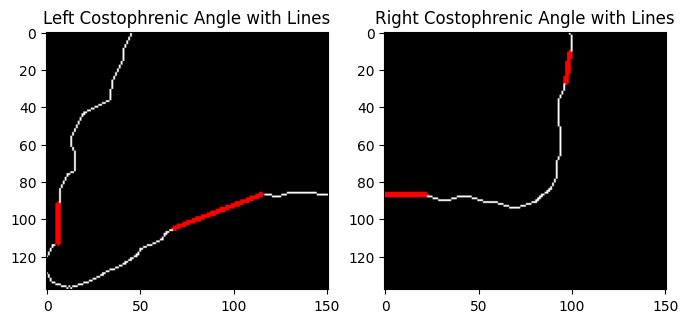

In [287]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_costophrenic_angles_edges(image_path):
    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Find the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Extract the lower part of the lung where the costophrenic angles are located
    lung_bottom = mask[y + h // 2:y + h, x:x + w]

    # Extract left and right costophrenic angles (lower corners)
    h_bottom, w_bottom = lung_bottom.shape
    left_costophrenic_angle = lung_bottom[h_bottom // 2:, :w_bottom // 2]
    right_costophrenic_angle = lung_bottom[h_bottom // 2:, w_bottom // 2:]

    # Apply Canny edge detection
    left_edges = cv2.Canny(left_costophrenic_angle, 50, 150)
    right_edges = cv2.Canny(right_costophrenic_angle, 50, 150)

    return left_edges, right_edges

def calculate_angle_and_draw_lines(edges):
    # Convert edges to BGR for color drawing
    colored_edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Find lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=20, minLineLength=10, maxLineGap=5)
    if lines is None:
        raise ValueError("No lines detected")

    # Extract the first two lines
    if len(lines) < 2:
        raise ValueError("Not enough lines detected to calculate angle")

    line1 = lines[0][0]
    line2 = lines[1][0]

    # Draw the lines on the image
    cv2.line(colored_edges, (line1[0], line1[1]), (line1[2], line1[3]), (0, 0, 255), 2)
    cv2.line(colored_edges, (line2[0], line2[1]), (line2[2], line2[3]), (0, 0, 255), 2)

    # Calculate the angles of the lines
    angle1 = np.arctan2(line1[3] - line1[1], line1[2] - line1[0])
    angle2 = np.arctan2(line2[3] - line2[1], line2[2] - line2[0])

    # Calculate the angle between the two lines
    angle_between_lines = np.abs(angle1 - angle2)
    angle_between_lines = np.degrees(angle_between_lines)

    if angle_between_lines > 180:
        angle_between_lines = 360 - angle_between_lines

    return angle_between_lines, colored_edges

def find_angle(left_edges, right_edges):
    try:
        left_angle, left_with_lines = calculate_angle_and_draw_lines(left_edges)
        right_angle, right_with_lines = calculate_angle_and_draw_lines(right_edges)

        return left_angle, right_angle, left_with_lines, right_with_lines
    except Exception as e:
        print(f"Error calculating angles: {e}")
        return None, None, left_edges, right_edges

# Example usage
image_path = "/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png"
left_edges, right_edges = extract_costophrenic_angles_edges(image_path)
left_angle, right_angle, left_with_lines, right_with_lines = find_angle(left_edges, right_edges)
print(f"Left Costophrenic Angle: {left_angle} degrees")
print(f"Right Costophrenic Angle: {right_angle} degrees")

# Display the results
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(left_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Left Costophrenic Angle with Lines')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(right_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Right Costophrenic Angle with Lines')

plt.show()


Left Costophrenic Angle: 69.04422326936782 degrees
Right Costophrenic Angle: 82.8749836510982 degrees


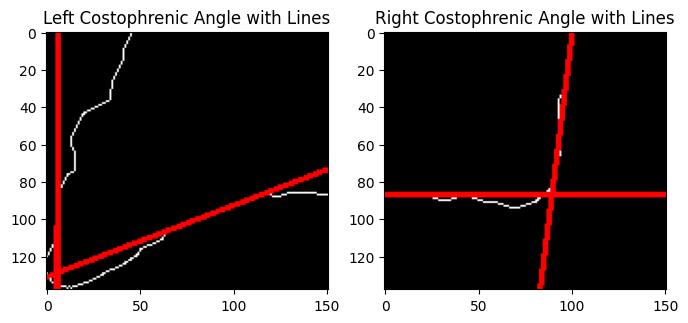

In [288]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_costophrenic_angles_edges(image_path):
    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Find the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Extract the lower part of the lung where the costophrenic angles are located
    lung_bottom = mask[y + h // 2:y + h, x:x + w]

    # Extract left and right costophrenic angles (lower corners)
    h_bottom, w_bottom = lung_bottom.shape
    left_costophrenic_angle = lung_bottom[h_bottom // 2:, :w_bottom // 2]
    right_costophrenic_angle = lung_bottom[h_bottom // 2:, w_bottom // 2:]

    # Apply Canny edge detection
    left_edges = cv2.Canny(left_costophrenic_angle, 50, 150)
    right_edges = cv2.Canny(right_costophrenic_angle, 50, 150)

    return left_edges, right_edges

def extend_line(line, length=1000):
    x1, y1, x2, y2 = line
    angle = np.arctan2(y2 - y1, x2 - x1)
    x1_ext = int(x1 - length * np.cos(angle))
    y1_ext = int(y1 - length * np.sin(angle))
    x2_ext = int(x2 + length * np.cos(angle))
    y2_ext = int(y2 + length * np.sin(angle))
    return (x1_ext, y1_ext), (x2_ext, y2_ext)

def calculate_angle_and_draw_lines(edges):
    # Convert edges to BGR for color drawing
    colored_edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Find lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=20, minLineLength=10, maxLineGap=5)
    if lines is None:
        raise ValueError("No lines detected")

    # Extract the first two lines
    if len(lines) < 2:
        raise ValueError("Not enough lines detected to calculate angle")

    line1 = lines[0][0]
    line2 = lines[1][0]

    # Extend the lines
    pt1_line1, pt2_line1 = extend_line(line1)
    pt1_line2, pt2_line2 = extend_line(line2)

    # Draw the lines on the image
    cv2.line(colored_edges, pt1_line1, pt2_line1, (0, 0, 255), 2)
    cv2.line(colored_edges, pt1_line2, pt2_line2, (0, 0, 255), 2)

    # Calculate the angles of the lines
    angle1 = np.arctan2(line1[3] - line1[1], line1[2] - line1[0])
    angle2 = np.arctan2(line2[3] - line2[1], line2[2] - line2[0])

    # Calculate the angle between the two lines
    angle_between_lines = np.abs(angle1 - angle2)
    angle_between_lines = np.degrees(angle_between_lines)

    if angle_between_lines > 180:
        angle_between_lines = 360 - angle_between_lines

    return angle_between_lines, colored_edges

def find_angle(left_edges, right_edges):
    try:
        left_angle, left_with_lines = calculate_angle_and_draw_lines(left_edges)
        right_angle, right_with_lines = calculate_angle_and_draw_lines(right_edges)

        return left_angle, right_angle, left_with_lines, right_with_lines
    except Exception as e:
        print(f"Error calculating angles: {e}")
        return None, None, left_edges, right_edges

# Example usage
image_path = "/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png"
left_edges, right_edges = extract_costophrenic_angles_edges(image_path)
left_angle, right_angle, left_with_lines, right_with_lines = find_angle(left_edges, right_edges)
print(f"Left Costophrenic Angle: {left_angle} degrees")
print(f"Right Costophrenic Angle: {right_angle} degrees")

# Display the results
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(left_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Left Costophrenic Angle with Lines')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(right_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Right Costophrenic Angle with Lines')

plt.show()


In [289]:
import math

def slope(x1, y1, x2, y2):
  x_diff = x2-x1
  val_slope = 90
  if x_diff == 0:
    if y2-y1 < 0:
      val_slope = -90
    return val_slope
  else:
    return (y2 - y1) / (x2 - x1)

def angle(s1, s2):
  return math.degrees(math.atan((s1 - s2) / (1 + (s2 * s1))))

def signOfElement(element):
  sign = 0
  if element < 0:
    sign = -1
  else:
    sign = 1

In [290]:
def signs(slopes) :
  asign = np.sign(slopes)
  for idnx, signs in np. ndenumerate(asign):
    sign_bef = -1
    sign_next = 0
    if idnx[0] > 0:
      sign_bef = asign[idnx[0] - 1]
    if idnx[0] < len(asign) - 1:
      sign_next = asign[idnx[0] + 1]
    if idnx[0] != 0 and idnx[0] != len(asign) - 1:
      if (sign_bef == sign_next):
        signs = sign_next

    elif sign_bef != sign_next and signs == 0:
        signs = sign_bef

    elif idnx[0] == 0:
        if (sign_next != signs):
          signs = sign_next
    elif idnx[0] == len(asign) - 1:
        if (sign_bef != signs):
          signs = sign_bef
    asign[idnx[0]] = signs
  return asign

In [291]:
def pointsOfLine(arr, idx):
  points_of_line1 = []
  if len(idx)==0 :
    points_of_line1 = arr
  elif idx[0] != 0:
    line1_points = np.split(arr, [0, idx[0] + 1])
    points_of_line1 = line1_points[1]
  else:
    line1_points = np.split(arr, [0, idx[1] + 1])
    points_of_line1 = line1_points [1]
  return points_of_line1

In [292]:
def find_angle(left, right, center_left, center_right, image_path):

  angles = []
  image = cv2.imread(image_path)
  img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


  original = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  left_lung = left
  right_lung = right

  cx_left = center_left[0]
  cy_left = center_left[1]
  cx_right = center_right[0]
  cy_right = center_right[1]

  val_left = []
  val_right = []
  for val_x in left_lung:
    x_cord = val_x[0][0]
    y_cord = val_x[0][1]
    if x_cord > cx_left and y_cord > cy_left:
      val_left.append(val_x)
  points_left = np.vstack(val_left)
  M1 = cv2.moments(points_left)
  ccx_left = int(M1['m10'] / M1['m00'])
  ccy_left = int(M1['m01'] / M1['m00'])

  left_li = []
  for val in left_lung:
    x_cord = val[0][0]
    y_cord = val[0][1]
    if x_cord > ccx_left and y_cord > ccy_left:
      left_li.append(val)
      cv2. drawContours(original, [val], -1, (0, 0, 255), 3)

  slopes = []
  x_prev = -1
  y_prev = -1

  for point in left_li:
    x1 = point[0][0]
    y1 = point[0][1]
    if x_prev > 0 and y_prev > 0:
      slope_points = slope(x_prev, y_prev,x1,y1)
      slopes.append(slope_points)

    x_prev = x1
    y_prev = y1

  sign_set = signs(slopes)
  index_arr = np.nonzero(np.diff(sign_set))
  if len(index_arr[0]) == 0:
    angles.append (0)
  elif len(index_arr[0]) > 0:
    index = index_arr[0][0]
    if(len(index_arr[0])>1) :
      index = index_arr[0][len(index_arr[0])-1]

    split = np.split(slopes,[index, len(slopes)])
    slope1 = split[0]
    slope2 = split[1]

    idx1 = np.nonzero(np.diff(slope1))[0]

    rev_slope = np.flipud(slope2)

    idx2 = np.nonzero(np.diff(rev_slope))[0]

    splited_line = np.split(left_li,[index+1, len(left_li)])
    rev_arr = np.flipud(splited_line[0])
    line1 = pointsOfLine(rev_arr, idx1)
    line2 = pointsOfLine(splited_line[1], idx2)

    point1 = line1[0][0]
    point2 = line1[len(line1)-1][0]
    point3 = line2[0][0]
    point4 = line2[len(line2)-1][0]

    slopel = slope(point2[0], point2[1], point1[0], point1[1])
    slope2 = slope(point3[0], point3[1], point4[0], point4[1])

    ang = angle(slopel, slope2)
    angles.append (ang)

    print('angle of left lung', ang)

    return ang


# Finding Area of Whiteness at the Base of the Lung

In [293]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_whiteness_area_at_base(image_path):
    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 200, 255, cv2.THRESH_BINARY)  # Adjust threshold value as needed

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Find the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Extract the lower part of the lung where pleural effusion is typically located
    lung_bottom_mask = np.zeros_like(mask)
    lung_bottom_mask[y + h // 2:y + h, x:x + w] = 255

    # Apply the mask to the binary image to focus on the lung region
    masked_binary = cv2.bitwise_and( image_eq ,  image_eq , mask=lung_bottom_mask)

    # Find contours in the masked binary image
    contours_whiteness, _ = cv2.findContours(masked_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the area of the whiteness
    whiteness_area = 0
    for contour in contours_whiteness:
        whiteness_area += cv2.contourArea(contour)

    # Display the results
    # plt.figure(figsize=(12, 6))
    # plt.subplot(2, 3, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 3, 2)
    # plt.imshow(image_eq, cmap='gray')
    # plt.title('Histogram Equalized Image')

    # plt.subplot(2, 3, 3)
    # plt.imshow(binary, cmap='gray')
    # plt.title('Thresholded Image')

    # plt.subplot(2, 3, 5)
    # plt.imshow(masked_binary, cmap='gray')
    # plt.title('Masked Binary Image')

    # plt.show()

    return whiteness_area

# Example usage
whiteness_area = find_whiteness_area_at_base("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png")
print(f"Whiteness area at the base of the lung: {whiteness_area} pixels")


Whiteness area at the base of the lung: 18416.0 pixels


In [294]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_whiteness_area_at_base(image_path):
    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 100, 255, cv2.THRESH_BINARY)  # Adjust threshold value as needed

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Find the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Extract the lower part of the lung where pleural effusion is typically located
    lung_bottom_mask = np.zeros_like(mask)
    lung_bottom_mask[y + h // 2:y + h, x:x + w] = 255

    # Apply the mask to the binary image to focus on the lung region
    masked_binary = cv2.bitwise_and(binary, binary, mask=lung_bottom_mask)

    # Find contours in the masked binary image
    contours_whiteness, _ = cv2.findContours(masked_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the area of the whiteness
    whiteness_area = 0
    for contour in contours_whiteness:
        whiteness_area += cv2.contourArea(contour)

    # Draw the detected whiteness contours on the original image
    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored contour drawing
    cv2.drawContours(image_with_contours, contours_whiteness, -1, (0, 0, 255), 2)  # Draw contours in red

    # Display the results
    # plt.figure(figsize=(12, 6))
    # plt.subplot(2, 3, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 3, 2)
    # plt.imshow(image_eq, cmap='gray')
    # plt.title('Histogram Equalized Image')

    # plt.subplot(2, 3, 3)
    # plt.imshow(binary, cmap='gray')
    # plt.title('Thresholded Image')

    # plt.subplot(2, 3, 4)
    # plt.imshow(masked_binary, cmap='gray')
    # plt.title('Masked Binary Image')

    # plt.subplot(2, 3, 5)
    # plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    # plt.title('Contours on Original Image')

    # plt.show()

    return whiteness_area

# Example usage
whiteness_area = find_whiteness_area_at_base("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png")
print(f"Whiteness area at the base of the lung: {whiteness_area} pixels")


Whiteness area at the base of the lung: 36673.5 pixels


In [295]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_whiteness_area_at_base(image_path):
    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 100, 255, cv2.THRESH_BINARY)  # Adjust threshold value as needed

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Extract the lower part of the lung where pleural effusion is typically located
    lung_bottom_mask = np.zeros_like(mask)
    h = mask.shape[0]
    lung_bottom_mask[h // 2:h, :] = 255

    # Apply the mask to the binary image to focus on the lung region
    masked_binary = cv2.bitwise_and(binary, binary, mask=lung_bottom_mask)

    # Find contours in the masked binary image
    contours_whiteness, _ = cv2.findContours(masked_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the area of the whiteness and approximate contours
    whiteness_area = 0
    approx_contours = []
    for contour in contours_whiteness:
        whiteness_area += cv2.contourArea(contour)
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        approx_contours.append(approx)

    # Draw the approximated whiteness contours on the original image
    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored contour drawing
    cv2.drawContours(image_with_contours, approx_contours, -1, (0, 0, 255), 2)  # Draw contours in red

    # Display the results
    # plt.figure(figsize=(12, 6))
    # plt.subplot(2, 3, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 3, 2)
    # plt.imshow(image_eq, cmap='gray')
    # plt.title('Histogram Equalized Image')

    # plt.subplot(2, 3, 3)
    # plt.imshow(binary, cmap='gray')
    # plt.title('Thresholded Image')

    # plt.subplot(2, 3, 4)
    # plt.imshow(masked_binary, cmap='gray')
    # plt.title('Masked Binary Image')

    # plt.subplot(2, 3, 5)
    # plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    # plt.title('Contours on Original Image')

    # plt.show()

    return whiteness_area

# Example usage
whiteness_area = find_whiteness_area_at_base("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png")
print(f"Whiteness area at the base of the lung: {whiteness_area} pixels")


Whiteness area at the base of the lung: 49828.5 pixels


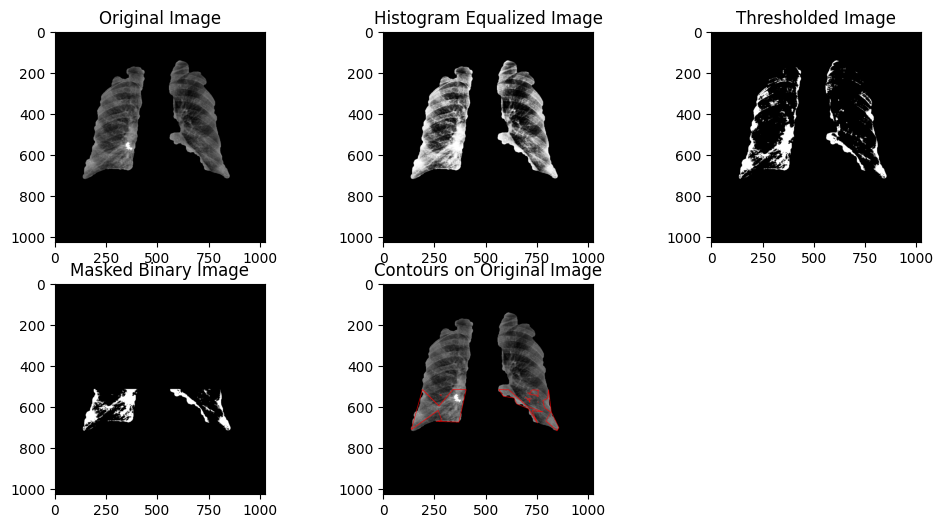

Whiteness area at the base of the lung: 35887.5 pixels


In [311]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_whiteness_area_at_base(image_path):
    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 200, 255, cv2.THRESH_BINARY)  # Adjust threshold value as needed

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Extract the lower part of the lung where pleural effusion is typically located
    lung_bottom_mask = np.zeros_like(mask)
    h = mask.shape[0]
    lung_bottom_mask[h // 2:h, :] = 255

    # Apply the mask to the binary image to focus on the lung region
    masked_binary = cv2.bitwise_and(binary, binary, mask=lung_bottom_mask)

    # Apply dilation followed by erosion to smooth the contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # Adjust kernel size as needed
    dilated = cv2.dilate(masked_binary, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=2)

    # Find the contour of the combined region
    combined_contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the area of the whiteness and approximate contours
    whiteness_area = 0
    approx_contours = []
    for contour in combined_contours:
        whiteness_area += cv2.contourArea(contour)
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        approx_contours.append(approx)

    # Draw the approximated whiteness contours on the original image
    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored contour drawing
    cv2.drawContours(image_with_contours, approx_contours, -1, (0, 0, 255), 2)  # Draw contours in red

    # Display the results
    # plt.figure(figsize=(12, 6))
    # plt.subplot(2, 3, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 3, 2)
    # plt.imshow(image_eq, cmap='gray')
    # plt.title('Histogram Equalized Image')

    # plt.subplot(2, 3, 3)
    # plt.imshow(binary, cmap='gray')
    # plt.title('Thresholded Image')

    # plt.subplot(2, 3, 4)
    # plt.imshow(masked_binary, cmap='gray')
    # plt.title('Masked Binary Image')

    # plt.subplot(2, 3, 5)
    # plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    # plt.title('Contours on Original Image')

    # plt.show()

    return whiteness_area

# Example usage
whiteness_area = find_whiteness_area_at_base("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png")
print(f"Whiteness area at the base of the lung: {whiteness_area} pixels")


## Find whiteness areas

In [297]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_whiteness_area_at_base(image_path):
    # Load the X-ray image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")

    # Apply histogram equalization for better contrast
    image_eq = cv2.equalizeHist(image)

    # Thresholding to get binary image
    _, binary = cv2.threshold(image_eq, 200, 255, cv2.THRESH_BINARY)  # Adjust threshold value as needed

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour which should correspond to the lung area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask from the largest contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Extract the lower part of the lung where pleural effusion is typically located
    lung_bottom_mask = np.zeros_like(mask)
    h = mask.shape[0]
    lung_bottom_mask[h // 2:h, :] = 255

    # Apply the mask to the binary image to focus on the lung region
    masked_binary = cv2.bitwise_and(binary, binary, mask=lung_bottom_mask)

    # Apply dilation followed by erosion to smooth the contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # Adjust kernel size as needed
    dilated = cv2.dilate(masked_binary, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=2)

    # Find the contour of the combined region
    combined_contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by their bottommost point (y-coordinate) and area
    sorted_contours = sorted(combined_contours, key=lambda c: (cv2.boundingRect(c)[1] + cv2.boundingRect(c)[3], cv2.contourArea(c)), reverse=True)[:2]

    # Calculate the area of the whiteness and approximate contours
    whiteness_area = 0
    approx_contours = []
    for contour in sorted_contours:
        whiteness_area += cv2.contourArea(contour)
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        approx_contours.append(approx)

    # Draw the approximated whiteness contours on the original image
    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored contour drawing
    cv2.drawContours(image_with_contours, approx_contours, -1, (0, 0, 255), 2)  # Draw contours in red

    # Display the results
    # plt.figure(figsize=(12, 6))
    # plt.subplot(2, 3, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 3, 2)
    # plt.imshow(image_eq, cmap='gray')
    # plt.title('Histogram Equalized Image')

    # plt.subplot(2, 3, 3)
    # plt.imshow(binary, cmap='gray')
    # plt.title('Thresholded Image')

    # plt.subplot(2, 3, 4)
    # plt.imshow(masked_binary, cmap='gray')
    # plt.title('Masked Binary Image')

    # plt.subplot(2, 3, 5)
    # plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    # plt.title('Contours on Original Image')

    # plt.show()

    return whiteness_area

# Example usage
whiteness_area = find_whiteness_area_at_base("/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion/segmented_87.png")
print(f"Whiteness area at the base of the lung: {whiteness_area} pixels")


Whiteness area at the base of the lung: 29900.0 pixels


## check the consistency of whiteness areas


In [298]:
def check_whiteness_consistency(image_path, threshold_area=10000):
    # Calculate the whiteness area and approximated contours
    whiteness_area = find_whiteness_area_at_base(image_path)

    # Check if the whiteness area is above the threshold
    is_whiteness_consistent = whiteness_area > threshold_area

    # Print results
    print(f"Whiteness area at the base of the lung: {whiteness_area} pixels")
    if is_whiteness_consistent:
        print("The whiteness areas are consistent.")
    else:
        print("The whiteness areas are not consistent.")

    # Return consistency result
    return is_whiteness_consistent


# Predict Effusion

In [303]:
def predict_effusion(left_blunted, right_blunted, is_whiteness_consistent):
    if left_blunted or right_blunted or is_whiteness_consistent:
        result = True  # Pleural effusion suspected
        message = "Pleural effusion is suspected. The costophrenic angle is blunted or whiteness areas are consistent."
    else:
        result = False  # No pleural effusion suspected
        message = "No pleural effusion suspected. Either the costophrenic angle is not blunted or the whiteness areas are not consistent."

    print(message)
    return result


In [300]:
import os

def iterate_through_images(directory):
    results = []
    image_files = [f for f in os.listdir(directory) if f.endswith('.png')]  # Adjust the file extension as needed

    for image_file in image_files:
        image_path = os.path.join(directory, image_file)

        # Determine if whiteness areas are consistent
        is_whiteness_consistent = check_whiteness_consistency(image_path)

        # Extract costophrenic angles and whiteness data
        left_edges, right_edges = extract_costophrenic_angles_edges(image_path)
        left_blunted, right_blunted = is_blunted(left_edges, right_edges)

        # Predict effusion
        result = predict_effusion(left_blunted, right_blunted, is_whiteness_consistent)
        results.append(result)

    return results

In [301]:
# Directory containing the segmented lung images
image_directory = '/content/drive/MyDrive/FYP/Lung/Segmented Images/Effusion'

# Get the detection results for all images
detection_results = iterate_through_images(image_directory)


Whiteness area at the base of the lung: 2997.5 pixels
The whiteness areas are not consistent.
Error calculating angles: Not enough lines detected to calculate angle
No pleural effusion suspected. Either the costophrenic angle is not blunted or the whiteness areas are not consistent.
Whiteness area at the base of the lung: 33247.5 pixels
The whiteness areas are consistent.
Error calculating angles: No lines detected
Pleural effusion is suspected. The costophrenic angle is blunted and whiteness areas are consistent.
Whiteness area at the base of the lung: 3.5 pixels
The whiteness areas are not consistent.
Error calculating angles: No lines detected
No pleural effusion suspected. Either the costophrenic angle is not blunted or the whiteness areas are not consistent.
Whiteness area at the base of the lung: 24341.5 pixels
The whiteness areas are consistent.
Left Costophrenic Angle: 70.4283792994792 degrees
Right Costophrenic Angle: 22.24902365721236 degrees
Left Costophrenic Angle Blunted: 

In [302]:
# Calculate accuracy
TP = sum(detection_results)  # Number of True Positives
all_images = len(detection_results)  # Total number of images

accuracy = TP / all_images if all_images > 0 else 0
print('Accuracy:', accuracy)

Accuracy: 0.6036585365853658


# Training the Model

In [310]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess the data
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = data_generator.flow_from_directory(
    'path_to_training_data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_data = data_generator.flow_from_directory(
    'path_to_training_data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=validation_data,
    validation_steps=validation_data.samples // validation_data.batch_size,
    epochs=10
)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_training_data'